### Importar librerias

In [1]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
from scipy.stats import truncnorm

### Eleccion del Dataset

##### https://www.kaggle.com/datasets/lainguyn123/student-performance-factors


In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Analisamos los tipos de datos de todas las columnas


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

##### Eliminamos valores nullos para evitar conflictos más adelante

In [5]:
df = df.dropna()
df.shape[0]


6378

### Eliminacion de columnas que no nos serviran para el analisis

In [6]:
df = df.loc[:, ['School_Type', 'Distance_from_Home', 'Previous_Scores', 'Exam_Score',
                'Access_to_Resources', 'Attendance']]

### Renombrar las columnas para que sea más sencillo trabajar con ellas 


In [7]:
df.columns=['school_type', 'distance_from_home', 'previous_scores', 'exam_score',
                'access_to_resources', 'hours_class']

#### Separar columnas numericas y categoricas


In [8]:
num_cols = []
for i in df.columns:
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        num_cols.append( i )
num_cols

['previous_scores', 'exam_score', 'hours_class']

In [9]:
cat_cols = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat_cols.append( i )
cat_cols

['school_type', 'distance_from_home', 'access_to_resources']

#### Distribucion columnas categoricas

In [10]:
dfi = df.groupby( cat_cols , as_index=False ).agg({
    "exam_score": ["count"]
})

dfi.columns = cat_cols + ["count"]

In [11]:
dfi.head(5)

,school_type,distance_from_home,access_to_resources,count
0,Private,Far,High,68
1,Private,Far,Low,38
2,Private,Far,Medium,85
3,Private,Moderate,High,189
4,Private,Moderate,Low,117


#### Estadisticas descriptivas para las variables numericas

In [12]:
df.describe()

,previous_scores,exam_score,hours_class
count,6378.000000,6378.000000,6378.000000
mean,75.066165,67.252117,80.020853
std,14.400389,3.914217,11.550723
min,50.000000,55.000000,60.000000
25%,63.000000,65.000000,70.000000
50%,75.000000,67.000000,80.000000
75%,88.000000,69.000000,90.000000
max,100.000000,101.000000,100.000000


### Distribuciones de las variables categoricas entre las numericas

<Figure size 1200x600 with 0 Axes>

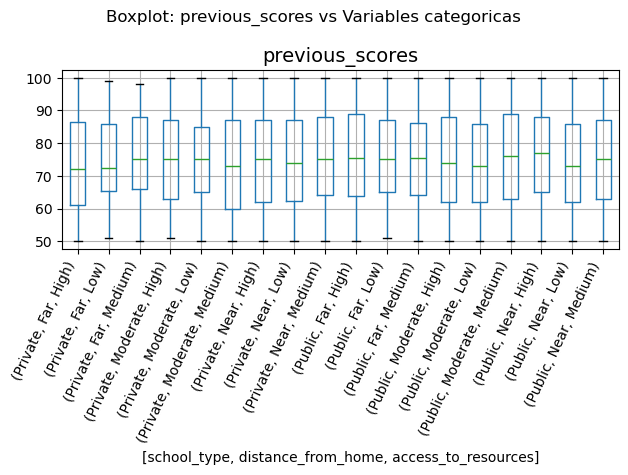

<Figure size 1200x600 with 0 Axes>

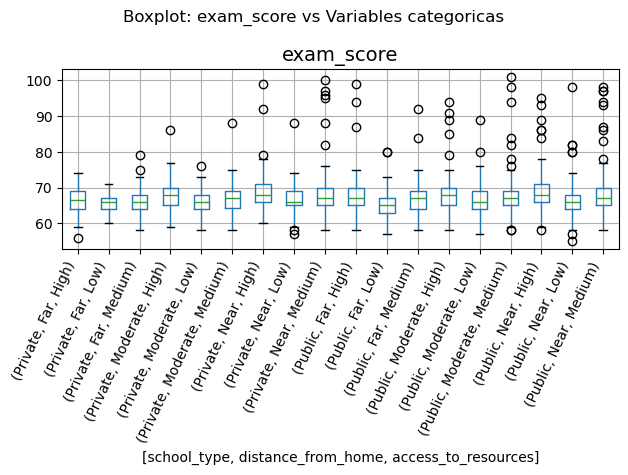

<Figure size 1200x600 with 0 Axes>

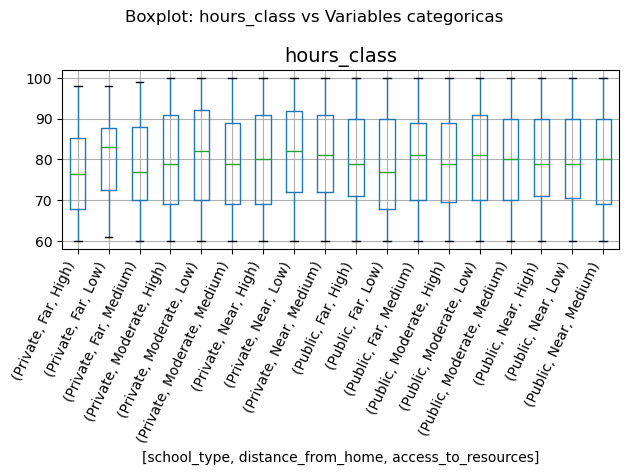

In [13]:
for num_col in num_cols:
    plt.figure(figsize=(12, 6))  
    
    df.boxplot(column=num_col, by=cat_cols,
                    )
    
    plt.title(f"{num_col}", fontsize=14)
    plt.suptitle(f"Boxplot: {num_col} vs Variables categoricas")
    plt.xticks(rotation=65, ha='right')
    plt.tight_layout()

#### 3- Simulación del Dataset Expandido


Este dataset ofrece una visión integral de diversos factores que afectan el rendimiento de los estudiantes en los exámenes. Incluye información sobre hábitos de estudio, asistencia, participación de los padres y otros aspectos que influyen en el éxito académico. 
para el analisis tomares en cuenta las columnas: school_type, distance_from_home, previous_scores, exam_score, access_to_resources, hours_class

In [14]:
diccionario = {}
new_col = []
for i in num_cols:
    new_col.append(f"{i}_lower_bound")
    new_col.append(f"{i}_upper_bound")
    diccionario[i] = [
        ('lower_bound' , lambda x: x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))),
        ('upper_bound', lambda x: x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)))
    ]
    


In [15]:
new_col

['previous_scores_lower_bound',
 'previous_scores_upper_bound',
 'exam_score_lower_bound',
 'exam_score_upper_bound',
 'hours_class_lower_bound',
 'hours_class_upper_bound']

creamos un nuevo DataFrame agrupado por las variables categoricas, y que contiene para cada grupo: El límite inferior y superior de cada columna numérica

In [16]:
dfd = df.groupby( cat_cols, as_index = False).agg(
    diccionario
)

In [17]:
dfd.columns = cat_cols + new_col

Agregamos los límites de los valores atipicos a cada fila del DataFrame original.

In [18]:
df_merge = df.merge(
    dfd,
    on=cat_cols,
    how='inner'
)

In [19]:
df_merge.head(10)

,school_type,distance_from_home,previous_scores,exam_score,access_to_resources,hours_class,previous_scores_lower_bound,previous_scores_upper_bound,exam_score_lower_bound,exam_score_upper_bound,hours_class_lower_bound,hours_class_upper_bound
0,Public,Near,73,67,High,84,30.500,122.500,58.5,78.5,42.5,118.5
1,Public,Moderate,59,61,Medium,64,24.000,128.000,59.0,75.0,40.0,120.0
2,Public,Near,91,74,Medium,98,27.000,123.000,57.5,77.5,37.5,121.5
3,Public,Moderate,98,71,Medium,89,24.000,128.000,59.0,75.0,40.0,120.0
4,Public,Near,65,70,Medium,92,27.000,123.000,57.5,77.5,37.5,121.5
5,Public,Near,89,71,Medium,88,27.000,123.000,57.5,77.5,37.5,121.5
6,Private,Moderate,68,67,Low,84,35.000,115.000,58.0,74.0,37.0,125.0
7,Public,Far,50,66,High,78,25.875,126.875,57.5,77.5,42.5,118.5
8,Private,Near,80,69,High,94,24.500,124.500,58.5,78.5,36.0,124.0
9,Public,Moderate,71,72,Medium,98,24.000,128.000,59.0,75.0,40.0,120.0


Eliminamos los valores atipicos

In [20]:
for i in num_cols:
    df_merge = df_merge.loc[
        (df_merge[i] < df_merge[f'{i}_upper_bound'])&(df_merge[i] > df_merge[f'{i}_lower_bound']), :
        ]
    

In [21]:
df_merge.head(5)

,school_type,distance_from_home,previous_scores,exam_score,access_to_resources,hours_class,previous_scores_lower_bound,previous_scores_upper_bound,exam_score_lower_bound,exam_score_upper_bound,hours_class_lower_bound,hours_class_upper_bound
0,Public,Near,73,67,High,84,30.5,122.5,58.5,78.5,42.5,118.5
1,Public,Moderate,59,61,Medium,64,24.0,128.0,59.0,75.0,40.0,120.0
2,Public,Near,91,74,Medium,98,27.0,123.0,57.5,77.5,37.5,121.5
3,Public,Moderate,98,71,Medium,89,24.0,128.0,59.0,75.0,40.0,120.0
4,Public,Near,65,70,Medium,92,27.0,123.0,57.5,77.5,37.5,121.5


Obtenemos las distribuciones probabilisticas 


In [22]:
prob_freq = df.groupby( cat_cols , as_index=False ).agg({
    "exam_score": ["count"]
})

prob_freq.columns = cat_cols + ["prob"]

Comprobamos que la suma de 1

In [23]:
np.sum( prob_freq["prob"] / df.shape[0] )

1.0

Sacamos los porcentajes 

In [24]:
prob_freq["prob"] = prob_freq["prob"] / df.shape[0] 

In [25]:
prob_freq

,school_type,distance_from_home,access_to_resources,prob
0,Private,Far,High,0.010662
1,Private,Far,Low,0.005958
2,Private,Far,Medium,0.013327
3,Private,Moderate,High,0.029633
4,Private,Moderate,Low,0.018344
5,Private,Moderate,Medium,0.044842
6,Private,Near,High,0.057698
7,Private,Near,Low,0.035434
8,Private,Near,Medium,0.088899
9,Public,Far,High,0.020696


Pasamos a un dataframe los datos sin los valores atipicos y miramos la correlacion de los valores categoricos con los numericos

In [26]:
df_clean = df_merge.loc[ : , cat_cols + num_cols ]

<Figure size 1200x600 with 0 Axes>

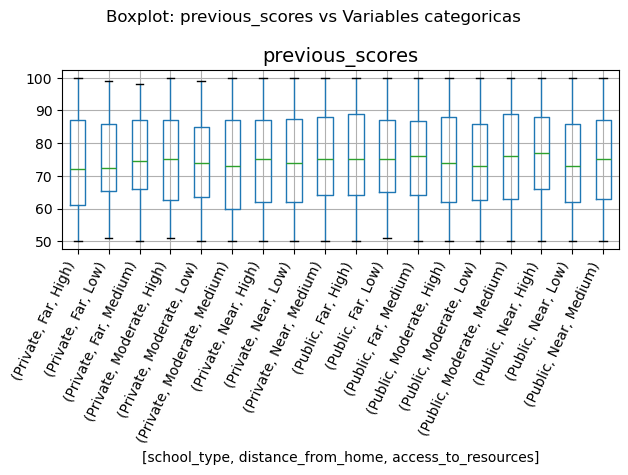

<Figure size 1200x600 with 0 Axes>

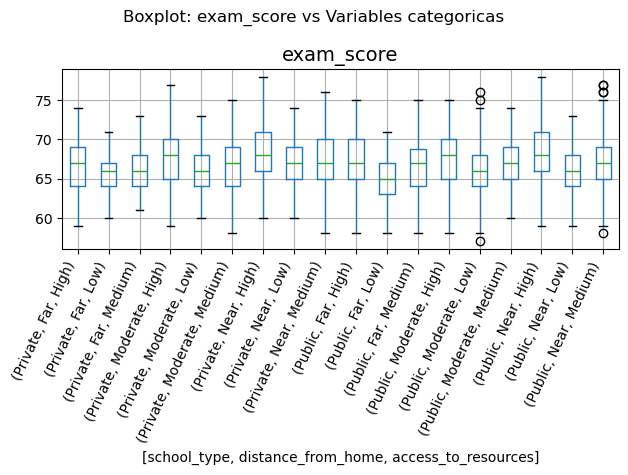

<Figure size 1200x600 with 0 Axes>

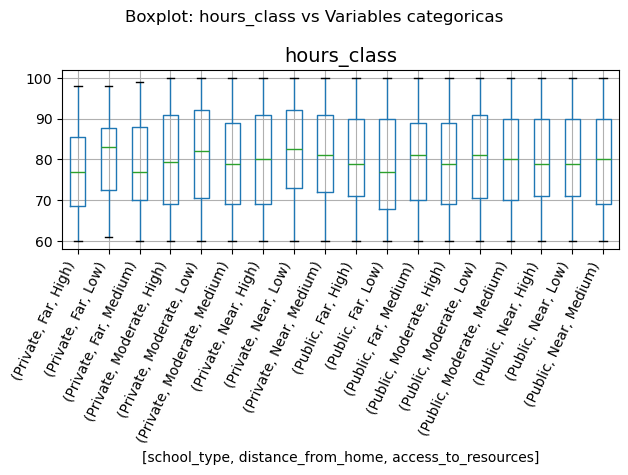

In [27]:
for num_col in num_cols:
    plt.figure(figsize=(12, 6))  
    
    df_clean.boxplot(column=num_col, by=cat_cols,
                    )
    
    plt.title(f"{num_col}", fontsize=14)
    plt.suptitle(f"Boxplot: {num_col} vs Variables categoricas")
    plt.xticks(rotation=65, ha='right')
    plt.tight_layout()

#### preparamos una configuración para calcular estadísticas descriptivas 

Creando un diccionario con qeu nos ayudara con el calculo de las estadisticas descriptivas de las columnas numericas

In [28]:
summ_aggregations = {}
cols_summ = []
for i in num_cols:
    summ_aggregations[i] = [ "min" , "max" , "mean" , "std" ]
    cols_summ.append( f"{i}_min" )
    cols_summ.append( f"{i}_max" )
    cols_summ.append( f"{i}_mean" )
    cols_summ.append( f"{i}_std" )

In [29]:
summ_aggregations

{'previous_scores': ['min', 'max', 'mean', 'std'],
 'exam_score': ['min', 'max', 'mean', 'std'],
 'hours_class': ['min', 'max', 'mean', 'std']}

Iniciando procedimiento para extender el dataset


agrupamos en un columnas categoricas para calcular las estadisticas numericas que contienen

In [30]:
df_summ = df_clean.groupby(
    cat_cols
    , as_index=False
).agg(summ_aggregations)

In [31]:
df_summ.columns = cat_cols +  cols_summ

In [32]:
df_summ.head(8)

,school_type,distance_from_home,access_to_resources,previous_scores_min,previous_scores_max,previous_scores_mean,previous_scores_std,exam_score_min,exam_score_max,exam_score_mean,exam_score_std,hours_class_min,hours_class_max,hours_class_mean,hours_class_std
0,Private,Far,High,50,100,73.358209,15.244176,59,74,66.552239,3.665083,60,98,77.552239,11.311410
1,Private,Far,Low,51,99,73.526316,13.391681,60,71,65.421053,2.595543,61,98,80.921053,10.718465
2,Private,Far,Medium,50,98,75.475610,12.929272,61,73,65.951220,2.703004,60,99,79.000000,11.745238
3,Private,Moderate,High,51,100,74.627660,14.112598,59,77,67.723404,3.385734,60,100,80.132979,12.154459
4,Private,Moderate,Low,50,99,74.078261,13.301595,60,73,66.086957,3.251357,60,100,80.800000,11.934911
5,Private,Moderate,Medium,50,100,73.319298,14.856822,58,75,66.607018,3.074192,60,100,79.456140,11.222259
6,Private,Near,High,50,100,75.112329,14.431383,60,78,68.216438,3.416951,60,100,80.101370,12.002432
7,Private,Near,Low,50,100,74.913636,15.107432,60,74,66.713636,3.036279,60,100,81.872727,11.223434


Comenzamos la expansión 

In [33]:
size_row = 100000
ids = np.random.choice( prob_freq.index , size=size_row, p=prob_freq["prob"].to_list() )

In [34]:
len( ids[ ids == 0 ] )

1064

In [35]:
len( ids[ ids == 0 ] ) / len( ids )

0.01064

La función trunc_vector genera valores aleatorios de una distribución normal truncada, con una media y desviación estándar dadas, restringidos dentro de un rango especificado. Devuelve un conjunto de muestras dentro de ese intervalo.

In [36]:
def trunc_vector(min_val, max_val, media, desv_std, size):
    # Calcular los límites 'a' y 'b' para la función truncnorm
    a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    # Generar muestras de la distribución normal truncada
    muestras = truncnorm.rvs(a, b, loc=media, scale=desv_std, size=size)
    return muestras

In [37]:
dfextended = pd.DataFrame()
for i in prob_freq.index:
    setting = {
        "id": ids[ ids == i ]
    }
    for c in num_cols:
        setting[c] = trunc_vector( 
            df_summ.iloc[i][f"{c}_min"]
            , df_summ.iloc[i][f"{c}_max"]
            , df_summ.iloc[i][f"{c}_mean"]
            , df_summ.iloc[i][f"{c}_std"]
            , len( ids[ ids == i ] )
        )
    tmp = pd.DataFrame(setting)
    dfextended = pd.concat( [ dfextended , tmp ] )

In [38]:
dfextended.shape[0]

100000

In [39]:
df_clean.describe()

,previous_scores,exam_score,hours_class
count,6295.000000,6295.000000,6295.000000
mean,75.055917,67.082129,80.031136
std,14.384989,3.299588,11.526609
min,50.000000,57.000000,60.000000
25%,63.000000,65.000000,70.000000
50%,75.000000,67.000000,80.000000
75%,87.500000,69.000000,90.000000
max,100.000000,78.000000,100.000000


Se agrega una columna id al df prob_freq usando su índice, y luego se fusiona con dfextended en base a esta columna id, manteniendo solo las filas que coinciden en ambos df

In [40]:
prob_freq["id"] = prob_freq.index

In [41]:
final = prob_freq.loc[ : , ["id"] + cat_cols ].merge(
    dfextended
    , on=["id"]
    , how="inner"
)

#### 4. Análisis Comparativo (EDA del Dataset Expandido)

analisis dataser original

In [42]:
# ----------------------------------------------------------------------------- 
# Estadísticas del Dataset Original: Descripción General 
# ----------------------------------------------------------------------------- 
print("Estadísticas del Dataset Original")
print(df['previous_scores'].describe())

# ----------------------------------------------------------------------------- 
# Análisis de la Simulación por 'Distance from home' 
# ----------------------------------------------------------------------------- 

# Análisis para 'Near' en 'distance_from_home'
print("\n-----------------------------------------------------------------------------")
print("Análisis de 'Distance from home' - Categoría: 'Near'")
near_scores = df[df['distance_from_home'] == 'Near']['previous_scores']
print(near_scores.describe())

# Análisis para 'Moderate' en 'distance_from_home'
print("\n-----------------------------------------------------------------------------")
print("Análisis de 'Distance from home' - Categoría: 'Moderate'")
moderate_scores = df[df['distance_from_home'] == 'Moderate']['previous_scores']
print(moderate_scores.describe())

# Análisis para 'Far' en 'distance_from_home'
print("\n-----------------------------------------------------------------------------")
print("Análisis de 'Distance from home' - Categoría: 'Far'")
far_scores = df[df['distance_from_home'] == 'Far']['previous_scores']
print(far_scores.describe())

# ----------------------------------------------------------------------------- 



Estadísticas del Dataset Original
count    6378.000000
mean       75.066165
std        14.400389
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: previous_scores, dtype: float64

-----------------------------------------------------------------------------
Análisis de 'Distance from home' - Categoría: 'Near'
count    3801.00000
mean       75.21468
std        14.40167
min        50.00000
25%        63.00000
50%        75.00000
75%        87.00000
max       100.00000
Name: previous_scores, dtype: float64

-----------------------------------------------------------------------------
Análisis de 'Distance from home' - Categoría: 'Moderate'
count    1941.000000
mean       74.773828
std        14.583526
min        50.000000
25%        62.000000
50%        74.000000
75%        88.000000
max       100.000000
Name: previous_scores, dtype: float64

-----------------------------------------------------------------------------
Análisis 

Al dar estadisticas muy similares en todas se podria concluir que es un dataset mal simulado

In [43]:
final = final.drop(columns=["id"])

In [44]:
final

,school_type,distance_from_home,access_to_resources,previous_scores,exam_score,hours_class
0,Private,Far,High,64.922762,62.680169,76.564448
1,Private,Far,High,88.534170,66.374828,68.849620
2,Private,Far,High,99.365530,70.119362,78.892855
3,Private,Far,High,60.244815,66.388668,84.719228
4,Private,Far,High,73.183219,66.830154,80.016922
...,...,...,...,...,...,...
99995,Public,Near,Medium,54.874054,71.282347,88.587578
99996,Public,Near,Medium,69.020849,71.393648,65.110220
99997,Public,Near,Medium,94.213287,67.093587,62.895392
99998,Public,Near,Medium,88.526171,65.421149,73.996628


In [45]:
final.describe()

,previous_scores,exam_score,hours_class
count,100000.000000,100000.000000,100000.000000
mean,75.067767,67.083250,79.990902
std,11.714197,3.171202,9.418600
min,50.001477,57.204000,60.003056
25%,66.278485,64.876378,72.938786
50%,75.097426,67.047782,79.978353
75%,83.823554,69.247588,87.011262
max,99.999750,77.959201,99.997772


In [46]:
df_clean.describe()

,previous_scores,exam_score,hours_class
count,6295.000000,6295.000000,6295.000000
mean,75.055917,67.082129,80.031136
std,14.384989,3.299588,11.526609
min,50.000000,57.000000,60.000000
25%,63.000000,65.000000,70.000000
50%,75.000000,67.000000,80.000000
75%,87.500000,69.000000,90.000000
max,100.000000,78.000000,100.000000


<Figure size 1200x600 with 0 Axes>

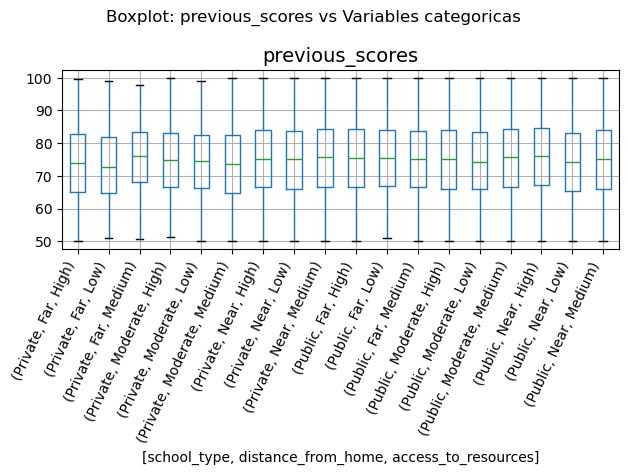

<Figure size 1200x600 with 0 Axes>

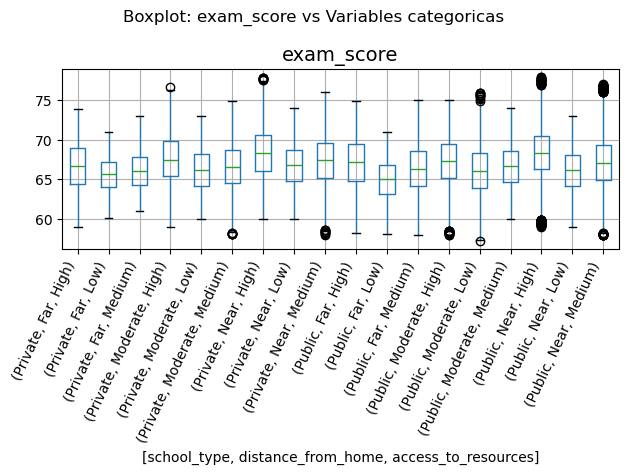

<Figure size 1200x600 with 0 Axes>

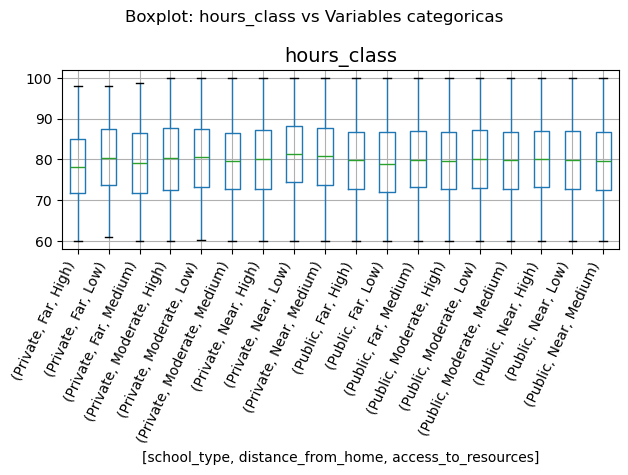

In [47]:
for num_col in num_cols:
    plt.figure(figsize=(12, 6))  
    
    final.boxplot(column=num_col, by=cat_cols,
                    )
    
    plt.title(f"{num_col}", fontsize=14)
    plt.suptitle(f"Boxplot: {num_col} vs Variables categoricas")
    plt.xticks(rotation=65, ha='right')
    plt.tight_layout()

In [48]:
df_summ_final = final.groupby(
    cat_cols
    , as_index=False
).agg(summ_aggregations)

In [49]:
df_summ_final.columns = cat_cols+  cols_summ

In [50]:
df_summ_final.head(5)

,school_type,distance_from_home,access_to_resources,previous_scores_min,previous_scores_max,previous_scores_mean,previous_scores_std,exam_score_min,exam_score_max,exam_score_mean,exam_score_std,hours_class_min,hours_class_max,hours_class_mean,hours_class_std
0,Private,Far,High,50.076066,99.755487,74.020469,11.718275,59.028570,73.952410,66.672200,3.256471,60.047091,97.978750,78.387555,9.079202
1,Private,Far,Low,51.037159,98.933033,73.285546,11.413238,60.131397,70.958617,65.638445,2.192100,61.095617,97.868496,80.446973,8.993060
2,Private,Far,Medium,50.592167,97.724841,75.965276,10.512869,61.056560,72.986966,66.156289,2.459784,60.151735,98.803949,79.288184,9.457104
3,Private,Moderate,High,51.220442,99.968578,74.793467,11.347238,59.033718,76.704254,67.611178,3.179786,60.037106,99.986126,80.135309,9.724512
4,Private,Moderate,Low,50.012079,98.906029,74.470225,10.976688,60.000083,72.980924,66.212413,2.829692,60.192760,99.905214,80.414913,9.585709


In [51]:
df_summ

,school_type,distance_from_home,access_to_resources,previous_scores_min,previous_scores_max,previous_scores_mean,previous_scores_std,exam_score_min,exam_score_max,exam_score_mean,exam_score_std,hours_class_min,hours_class_max,hours_class_mean,hours_class_std
0,Private,Far,High,50,100,73.358209,15.244176,59,74,66.552239,3.665083,60,98,77.552239,11.311410
1,Private,Far,Low,51,99,73.526316,13.391681,60,71,65.421053,2.595543,61,98,80.921053,10.718465
2,Private,Far,Medium,50,98,75.475610,12.929272,61,73,65.951220,2.703004,60,99,79.000000,11.745238
3,Private,Moderate,High,51,100,74.627660,14.112598,59,77,67.723404,3.385734,60,100,80.132979,12.154459
4,Private,Moderate,Low,50,99,74.078261,13.301595,60,73,66.086957,3.251357,60,100,80.800000,11.934911
5,Private,Moderate,Medium,50,100,73.319298,14.856822,58,75,66.607018,3.074192,60,100,79.456140,11.222259
6,Private,Near,High,50,100,75.112329,14.431383,60,78,68.216438,3.416951,60,100,80.101370,12.002432
7,Private,Near,Low,50,100,74.913636,15.107432,60,74,66.713636,3.036279,60,100,81.872727,11.223434
8,Private,Near,Medium,50,100,75.479501,14.371351,58,76,67.442068,3.280453,60,100,81.087344,11.577898
9,Public,Far,High,50,100,75.643411,14.068359,58,75,67.224806,3.593050,60,100,80.023256,11.263509


#### Conclusión
Según los resultados, podemos concluir que la simulación fue exitosa, ya que ambos DataFrames presentan valores similares en términos de las distribuciones de la media, el máximo, el mínimo y la desviación estándar. Esto indica que se respetaron los límites establecidos. Con base en esto, podemos afirmar que los datos no fueron alterados durante la simulación del DataFrame extendido, lo que nos permite confiar en su uso para el análisis de los datos.